In [1]:
import math
import numpy as np
import pandas as pd
import h5py
import scipy
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import layers
from tensorflow.python.framework import ops
from Constants_utils import *
%matplotlib inline

c:\Users\dell\miniconda3\envs\tf_cpu\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
X_train, y_train, X_test, y_test, classes = load_happy_dataset()

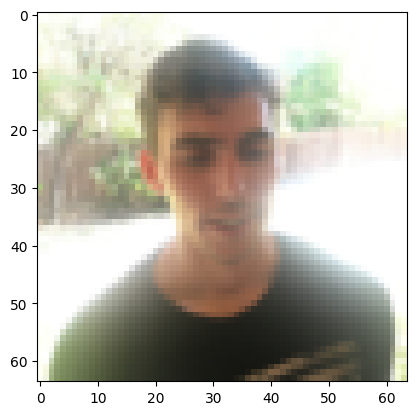

In [3]:
idx = 121
plt.imshow(X_train[idx])
plt.show()

In [4]:
X_train = X_train / 255.
X_test = X_test / 255.

y_train = y_train.T
y_test = y_test.T

print("Number of training samples: ", X_train.shape[0])
print("Number of test samples: ", X_test.shape[0])
print("X_train set shape: ", X_train.shape)
print("X_test set shape: ", X_test.shape)
print("y_train set shape:", y_train.shape)
print("y_test set shape: ", y_test.shape)

Number of training samples:  600
Number of test samples:  150
X_train set shape:  (600, 64, 64, 3)
X_test set shape:  (150, 64, 64, 3)
y_train set shape: (600, 1)
y_test set shape:  (150, 1)


In [5]:
def happy_model(input_shape):
    
    model = keras.Sequential([
        layers.ZeroPadding2D(padding = (3, 3),input_shape = (64, 64, 3), data_format = "channels_last"),
        layers.Conv2D(64, (7, 7), strides = (1, 1), activation = 'relu'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(32, activation = 'relu'),
        layers.Dropout(0.25),
        layers.Dense(1, activation = 'sigmoid'),
    ])
    
    return model

In [6]:
happy_model = happy_model((64, 64, 3))
#happy_model.summary()

In [7]:
happy_model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [8]:
history = happy_model.fit(X_train, y_train,
                batch_size = 64,
                validation_data = (X_test, y_test),
                epochs = 100,
                verbose = 2
                )

Epoch 1/100
10/10 - 10s - loss: 3.1854 - accuracy: 0.5383 - val_loss: 0.6924 - val_accuracy: 0.5200 - 10s/epoch - 1s/step
Epoch 2/100
10/10 - 7s - loss: 0.6236 - accuracy: 0.7100 - val_loss: 0.6961 - val_accuracy: 0.5600 - 7s/epoch - 713ms/step
Epoch 3/100
10/10 - 7s - loss: 0.5721 - accuracy: 0.7533 - val_loss: 0.6713 - val_accuracy: 0.5333 - 7s/epoch - 666ms/step
Epoch 4/100
10/10 - 8s - loss: 0.4461 - accuracy: 0.7983 - val_loss: 0.6565 - val_accuracy: 0.5800 - 8s/epoch - 825ms/step
Epoch 5/100
10/10 - 7s - loss: 0.3978 - accuracy: 0.8067 - val_loss: 0.6399 - val_accuracy: 0.5733 - 7s/epoch - 738ms/step
Epoch 6/100
10/10 - 8s - loss: 0.3479 - accuracy: 0.8233 - val_loss: 0.6184 - val_accuracy: 0.6000 - 8s/epoch - 755ms/step
Epoch 7/100
10/10 - 7s - loss: 0.3191 - accuracy: 0.8217 - val_loss: 0.5941 - val_accuracy: 0.6867 - 7s/epoch - 680ms/step
Epoch 8/100
10/10 - 7s - loss: 0.3106 - accuracy: 0.8133 - val_loss: 0.5785 - val_accuracy: 0.7067 - 7s/epoch - 702ms/step
Epoch 9/100
10/10

In [9]:
#happy_model.evaluate(X_test, y_test)

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

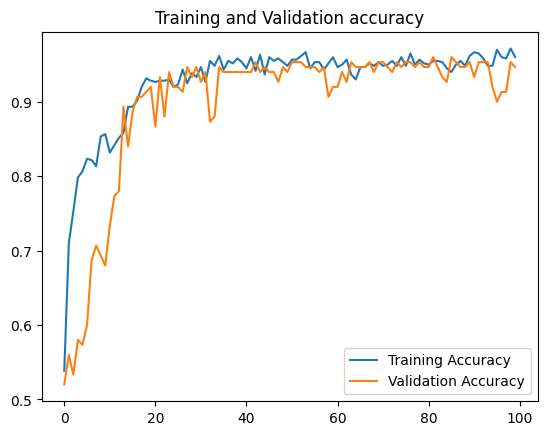

In [11]:
plt.plot(acc, label = "Training Accuracy")
plt.plot(val_acc, label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title("Training and Validation accuracy")
plt.show()

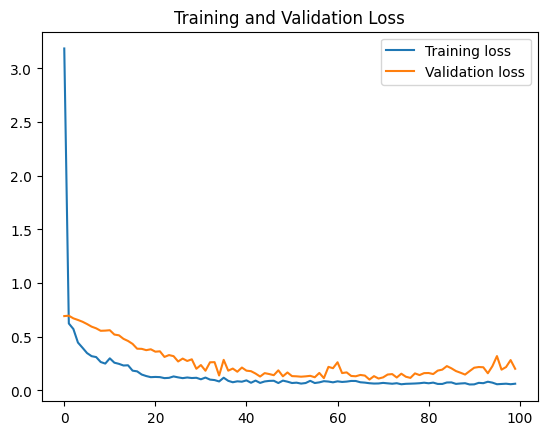

In [12]:
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label = "Validation loss")
plt.legend(loc = 'upper right')
plt.title("Training and Validation Loss")
plt.show()